In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Cust_Segmentation.csv')

In [3]:
print(data.head())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [4]:
data.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [5]:
data = data.drop_duplicates()
data = data.dropna()

In [6]:
data.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [7]:
selected_features = data[['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio', 'Defaulted']]

In [8]:
scaler = StandardScaler()
selected_features = scaler.fit_transform(selected_features)

In [9]:
selected_features

array([[ 0.76830405, -0.35900652, -0.72310225, ..., -0.60428433,
        -0.58052847, -0.59494973],
       [ 1.51908977,  2.64702891,  1.47870741, ...,  1.5706204 ,
         0.37222169, -0.59494973],
       [-0.23274357,  0.24220057,  0.30984549, ...,  0.83520125,
         1.55949495,  1.68081427],
       ...,
       [-1.2337912 , -1.26081715, -0.75028509, ...,  0.04620852,
         3.39170678,  1.68081427],
       [-0.35787453,  0.54280411, -0.47845673, ..., -0.71904138,
        -1.07889008, -0.59494973],
       [ 2.14474454,  1.1440112 ,  0.50012534, ...,  0.17648972,
        -0.24340149, -0.59494973]])

In [10]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(selected_features)
    inertia.append(kmeans.inertia_)

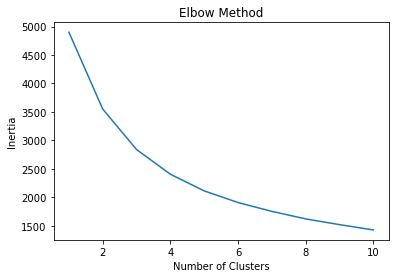

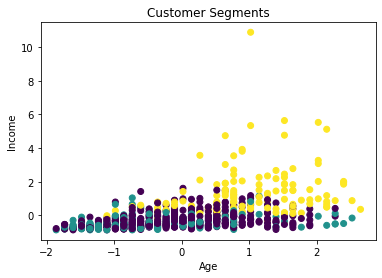

In [11]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(selected_features)
plt.scatter(selected_features[:, 0], selected_features[:, 2], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segments')
plt.show()

# When should we split the data into training and testing sets when using K-means clustering, and why?

 When using K-means clustering, the data should be split into training and testing sets before applying the clustering algorithm.

The purpose of splitting the data is to evaluate the performance of the K-means clustering algorithm on new, unseen data. This is essential to ensure that the model generalizes well to new data and is not overfitting to the training data.

 The data should be split into a training set and a testing set before the clustering algorithm is applied. The training set is used to fit the model, i.e., to determine the optimal number of clusters and the cluster centers. The testing set is then used to evaluate the performance of the model by measuring the similarity between the predicted clusters and the actual clusters.

# Why do we need to scale the features before performing K-means clustering?

Scaling the features before performing K-means clustering is important for two main reasons:

Preventing Features with Larger Magnitudes from Dominating the Clustering Process:
K-means clustering relies on the distance between data points to form clusters. If the features have different scales, features with larger magnitudes will dominate the distance calculation and clustering process, leading to biased and inaccurate results.

Achieving Better Convergence and Performance:
K-means clustering is an iterative algorithm that aims to minimize the sum of squared distances between the data points and their assigned cluster centers. If the features are not scaled, the optimization process may take a longer time to converge or even fail to converge, leading to suboptimal clustering results.